# Data Analysis and Visualization Notebook

This notebook analyzes a given dataset, displays statistics, and provides visualizations for each column to understand the distribution of the data. This analysis will help in deciding if any preprocessing, like scaling or normalization, is required to handle values close to 0, especially for quantization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset
Provide the path to the dataset CSV file to load it.

In [2]:
# Load the dataset
dataset_path = './datasets/CICIDS2017/balanced_binary/test.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166967 entries, 0 to 166966
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           166967 non-null  int64  
 1   Destination Port             166967 non-null  float64
 2   Flow Duration                166967 non-null  float64
 3   Total Fwd Packets            166967 non-null  float64
 4   Total Backward Packets       166967 non-null  float64
 5   Total Length of Fwd Packets  166967 non-null  float64
 6   Total Length of Bwd Packets  166967 non-null  float64
 7   Fwd Packet Length Max        166967 non-null  float64
 8   Fwd Packet Length Min        166967 non-null  float64
 9   Fwd Packet Length Mean       166967 non-null  float64
 10  Fwd Packet Length Std        166967 non-null  float64
 11  Bwd Packet Length Max        166967 non-null  float64
 12  Bwd Packet Length Min        166967 non-null  float64
 13 

## Basic Statistics
Show basic statistics of the dataset.

In [3]:
# Display basic statistics
data.describe()

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.669670e+05,166967.000000,1.669670e+05,166967.000000,166967.000000,1.669670e+05,1.669670e+05,166967.000000,166967.000000,166967.000000,...,1.669670e+05,1.669670e+05,166967.000000,1.669670e+05,1.669670e+05,166967.000000,166967.000000,166967.000000,166967.000000,166967.000000
mean,5.568205e+05,0.090568,1.697911e-01,0.000033,0.000031,3.269776e-05,2.240599e-05,0.007110,0.005296,0.007802,...,9.999998e-01,7.920674e-04,0.000439,1.236609e-03,6.114374e-04,0.128573,0.011378,0.134122,0.123170,0.499997
std,3.216015e+05,0.235769,3.156314e-01,0.003257,0.003308,4.904989e-04,3.197251e-03,0.024408,0.022635,0.026581,...,1.284500e-08,5.549744e-03,0.004827,8.257460e-03,4.966261e-03,0.271357,0.082137,0.278474,0.269583,0.500001
min,2.000000e+00,0.000000,9.999999e-08,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,9.999997e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.778655e+05,0.001221,7.249999e-07,0.000000,0.000003,1.550388e-07,1.525662e-09,0.000081,0.000000,0.000337,...,9.999998e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.565540e+05,0.001221,3.929666e-04,0.000005,0.000007,3.720930e-06,1.708742e-07,0.001249,0.000000,0.003114,...,9.999998e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.360210e+05,0.006760,7.385230e-02,0.000023,0.000017,2.441860e-05,9.206609e-06,0.009307,0.002581,0.008152,...,9.999998e-01,3.636364e-08,0.000000,3.636364e-08,3.636364e-08,0.050557,0.000000,0.050582,0.046839,1.000000
max,1.113101e+06,0.999954,9.999998e-01,0.898588,0.909883,1.275825e-01,8.818328e-01,1.000000,0.852903,0.999735,...,9.999999e-01,2.854545e-01,0.292055,4.273436e-01,2.854545e-01,1.000000,0.972692,1.000000,1.000000,1.000000


## Data Distribution and Analysis
Visualize the distribution of each column in the dataset and analyze how many values are close to 0.

Column: ID
Number of values close to 0: 0
Percentage of values close to 0: 0.00%


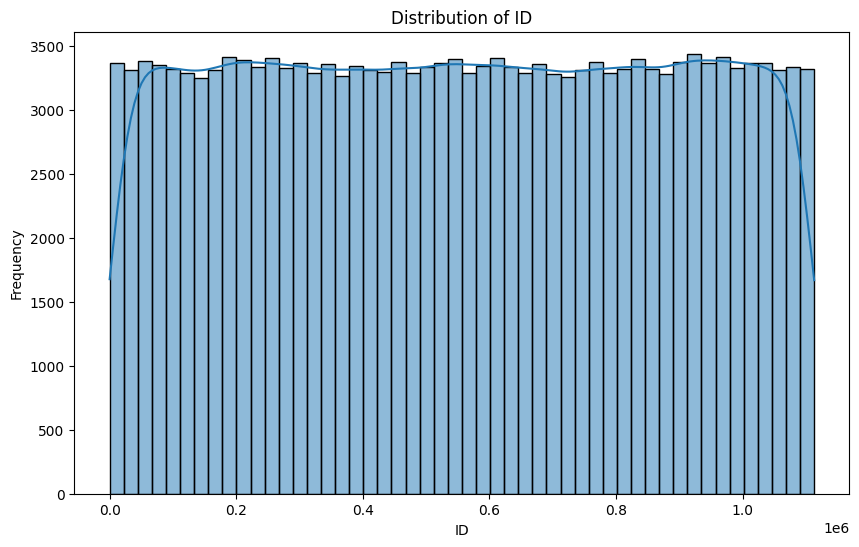



Column: Destination Port
Number of values close to 0: 62
Percentage of values close to 0: 0.04%


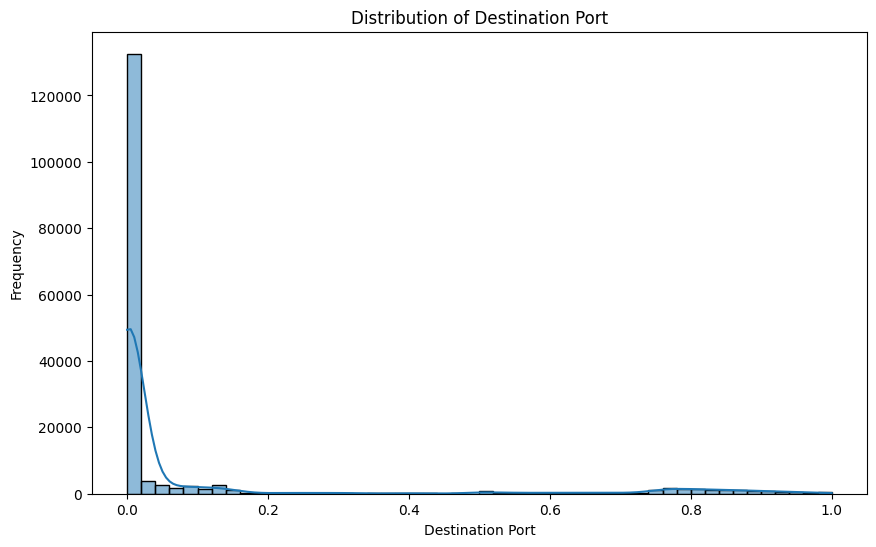



Column: Flow Duration
Number of values close to 0: 46861
Percentage of values close to 0: 28.07%


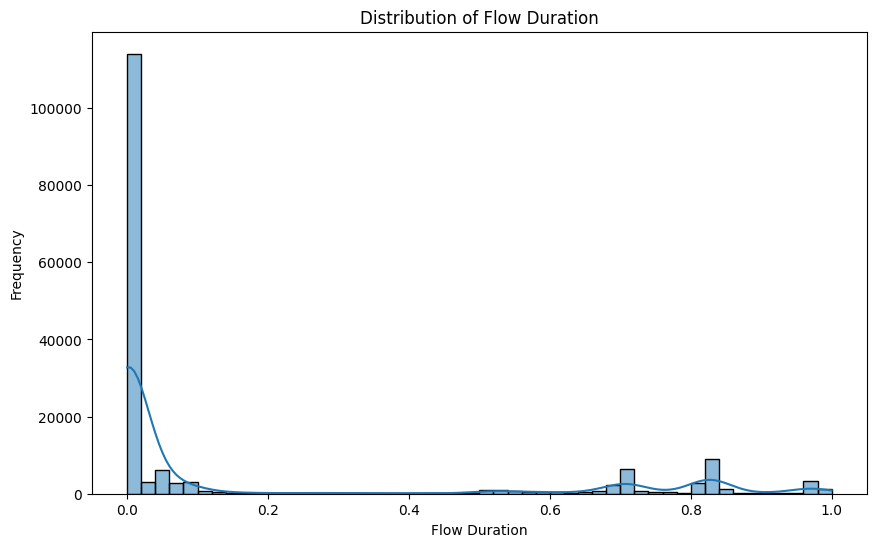



Column: Total Fwd Packets
Number of values close to 0: 43872
Percentage of values close to 0: 26.28%


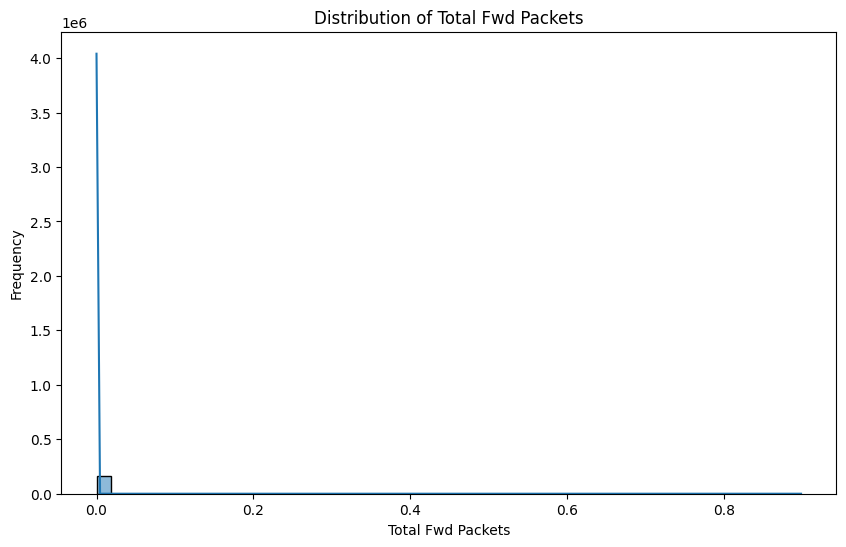



Column: Total Backward Packets
Number of values close to 0: 30320
Percentage of values close to 0: 18.16%


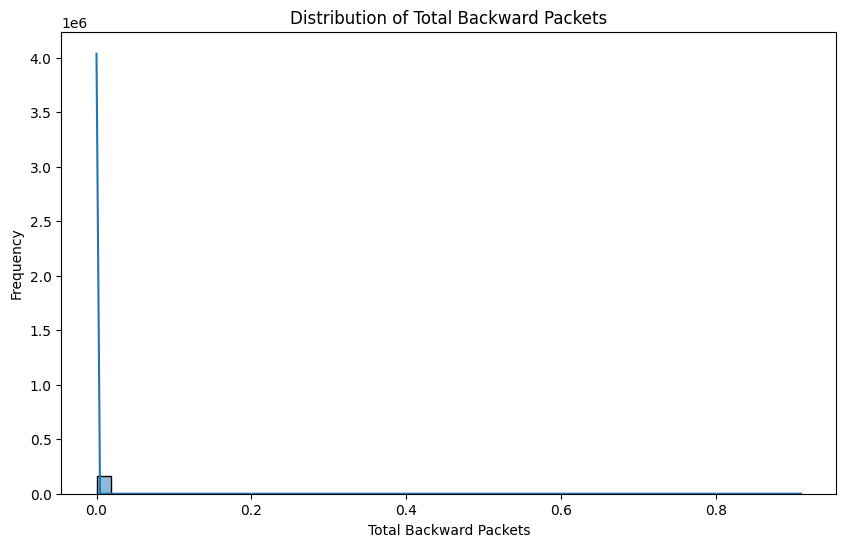



Column: Total Length of Fwd Packets
Number of values close to 0: 58778
Percentage of values close to 0: 35.20%


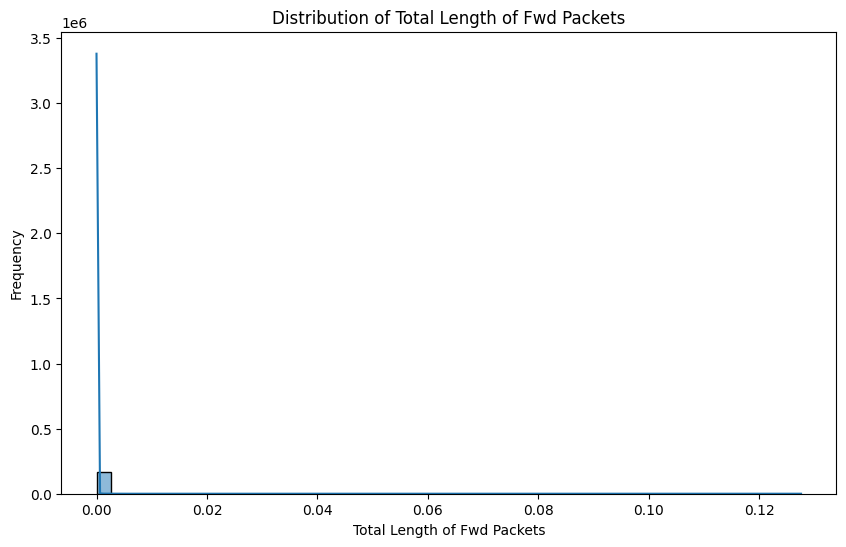



Column: Total Length of Bwd Packets
Number of values close to 0: 114265
Percentage of values close to 0: 68.44%


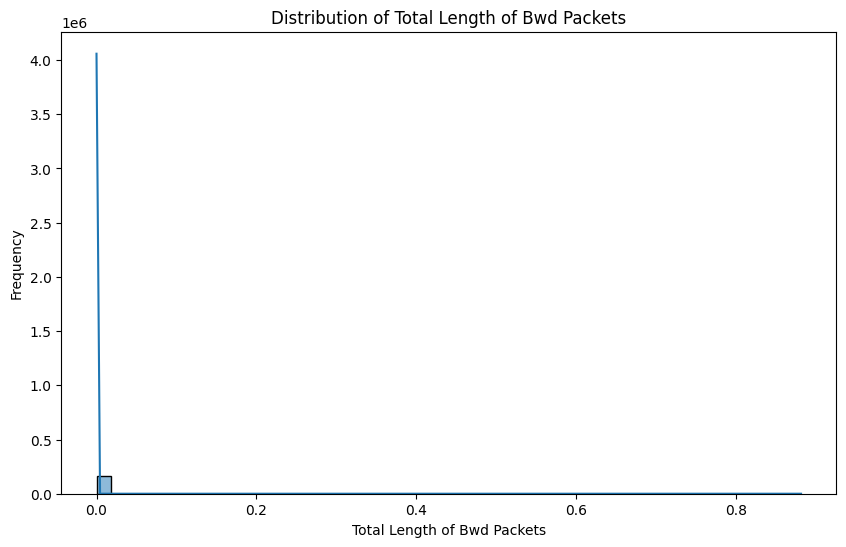



Column: Fwd Packet Length Max
Number of values close to 0: 34048
Percentage of values close to 0: 20.39%


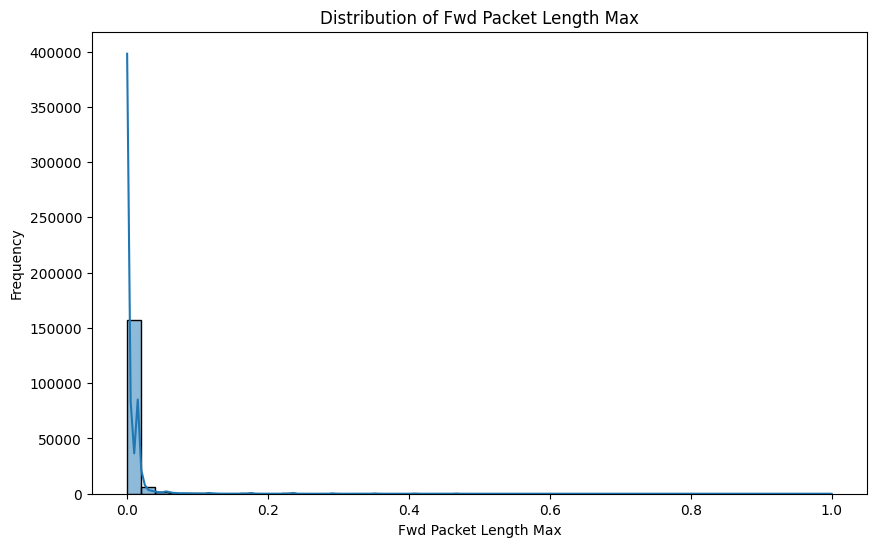



Column: Fwd Packet Length Min
Number of values close to 0: 95878
Percentage of values close to 0: 57.42%


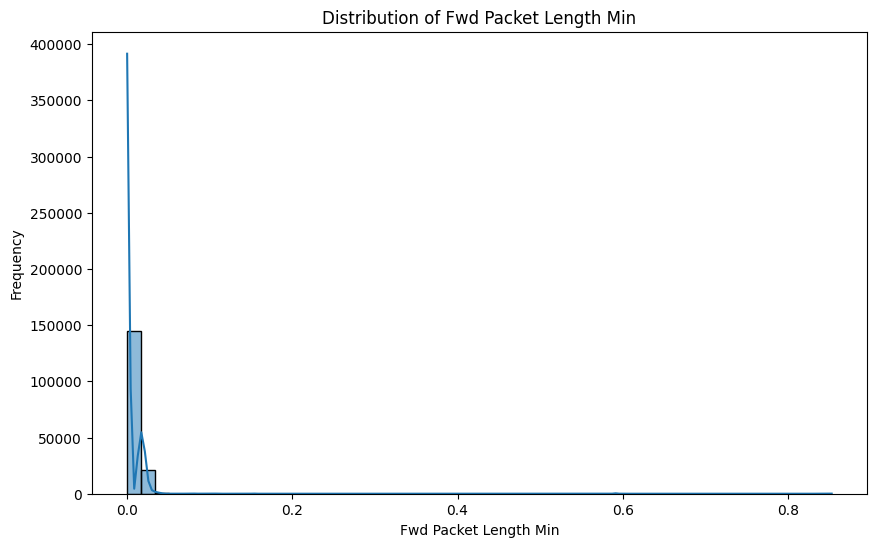



Column: Fwd Packet Length Mean
Number of values close to 0: 34048
Percentage of values close to 0: 20.39%


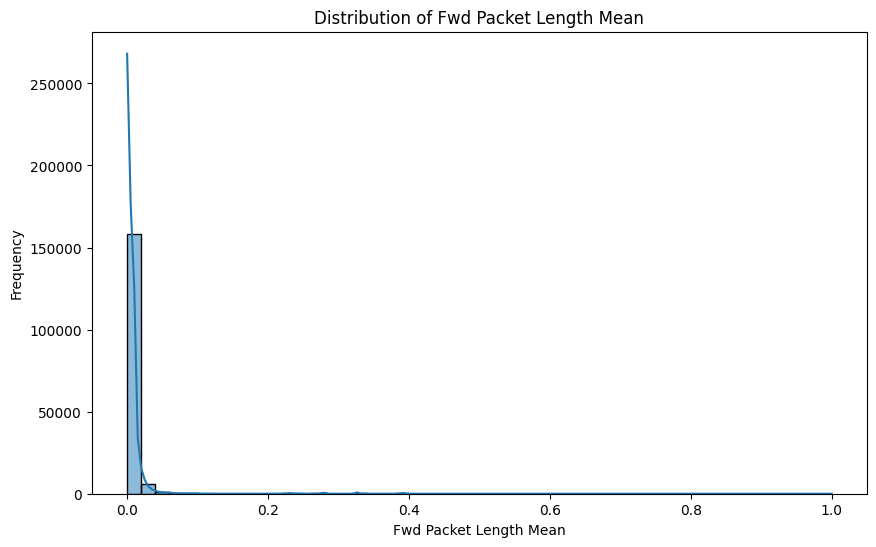



Column: Fwd Packet Length Std
Number of values close to 0: 101039
Percentage of values close to 0: 60.51%


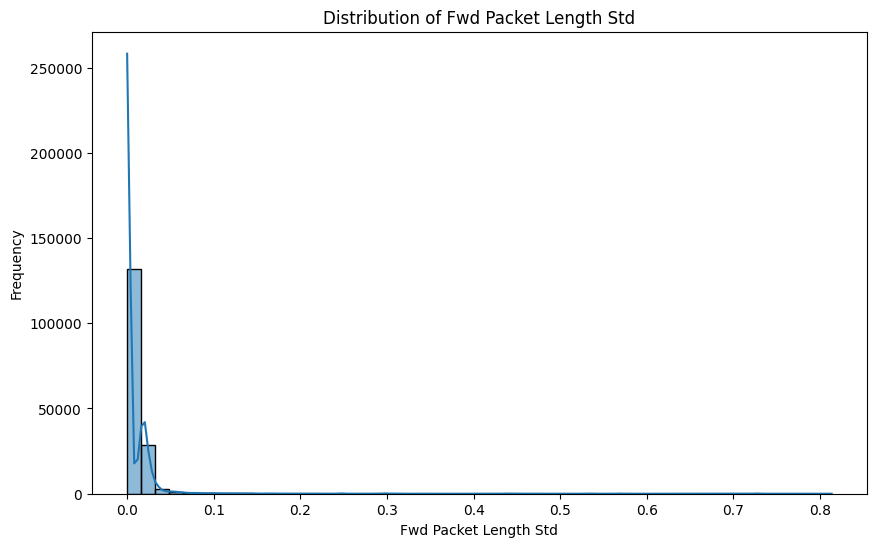



Column: Bwd Packet Length Max
Number of values close to 0: 41740
Percentage of values close to 0: 25.00%


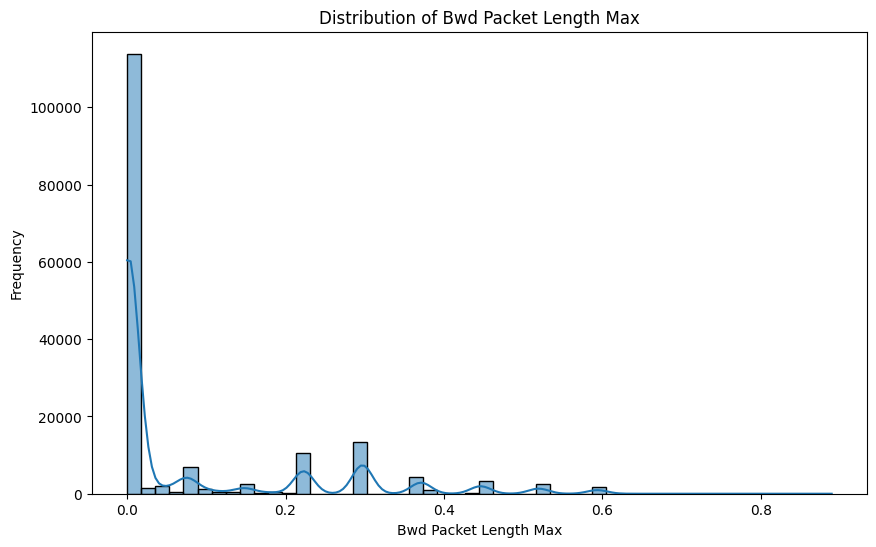



Column: Bwd Packet Length Min
Number of values close to 0: 97756
Percentage of values close to 0: 58.55%


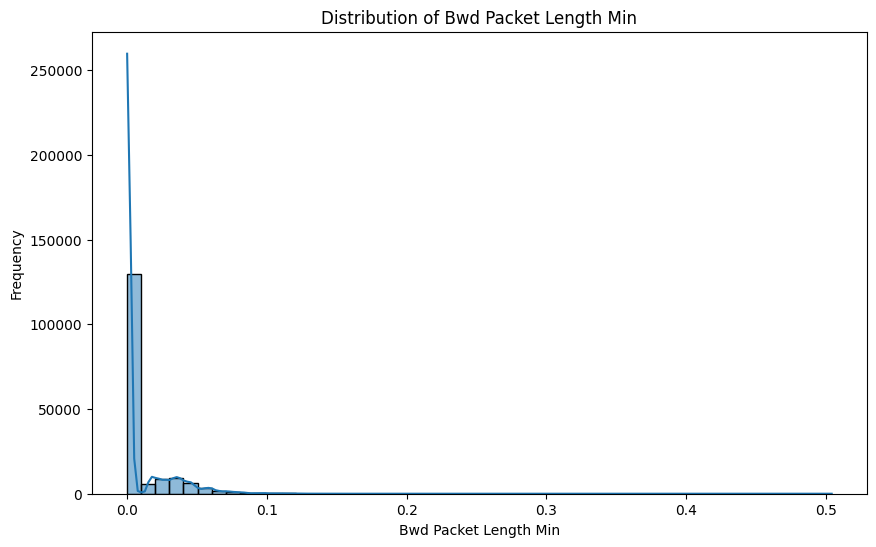



Column: Bwd Packet Length Mean
Number of values close to 0: 41740
Percentage of values close to 0: 25.00%


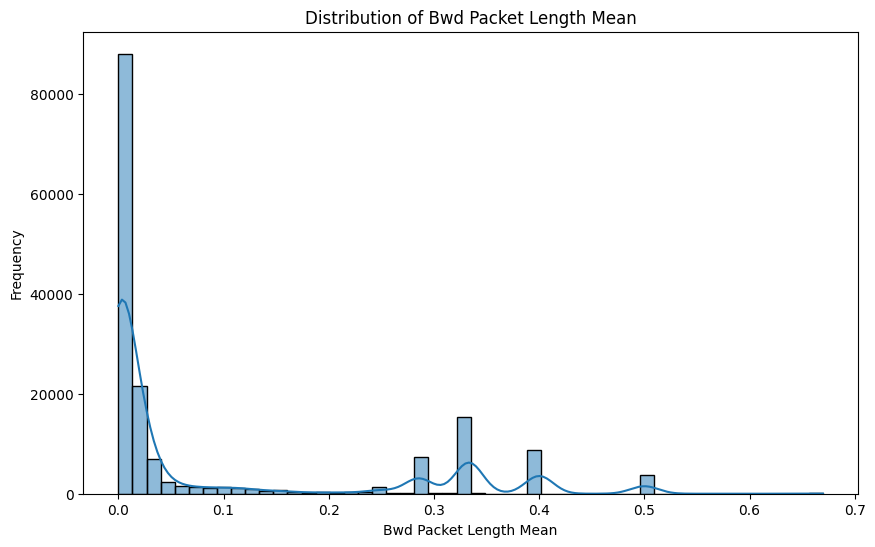



Column: Bwd Packet Length Std
Number of values close to 0: 108157
Percentage of values close to 0: 64.78%


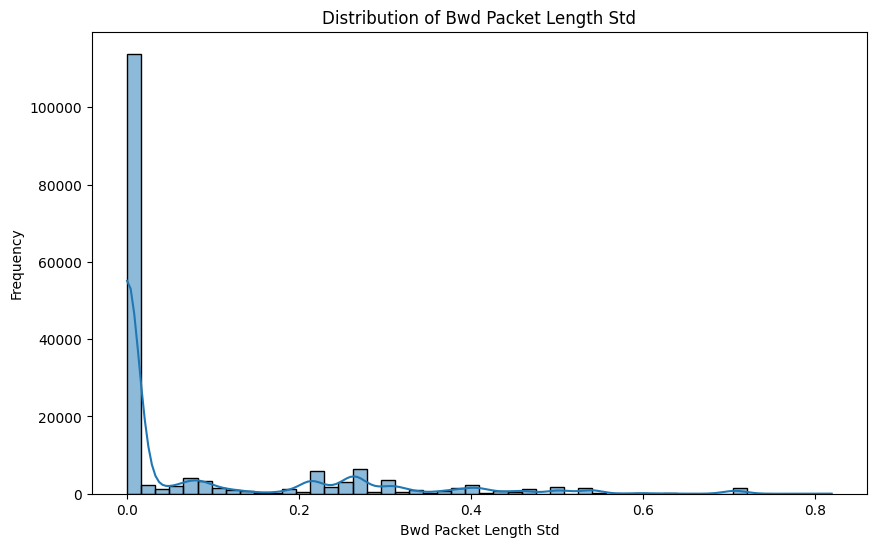



Column: Flow Bytes/s
Number of values close to 0: 0
Percentage of values close to 0: 0.00%


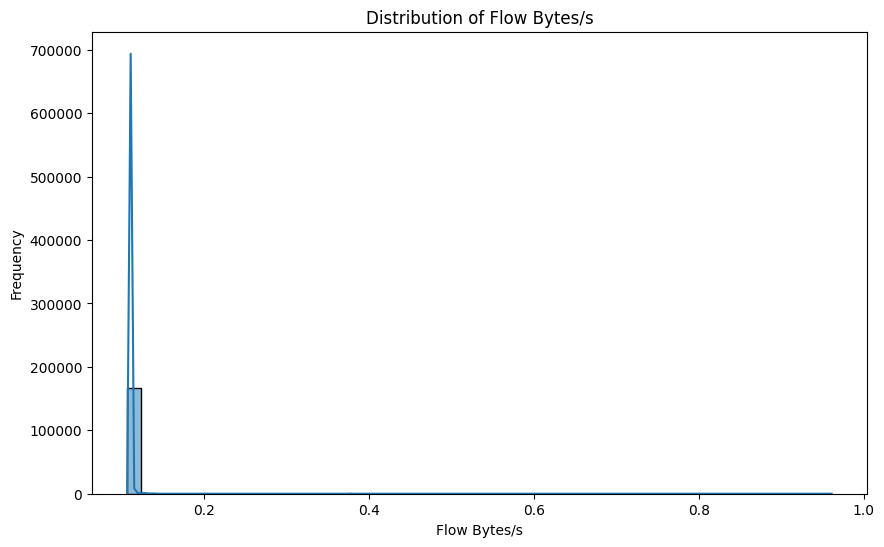



Column: Flow Packets/s
Number of values close to 0: 4
Percentage of values close to 0: 0.00%


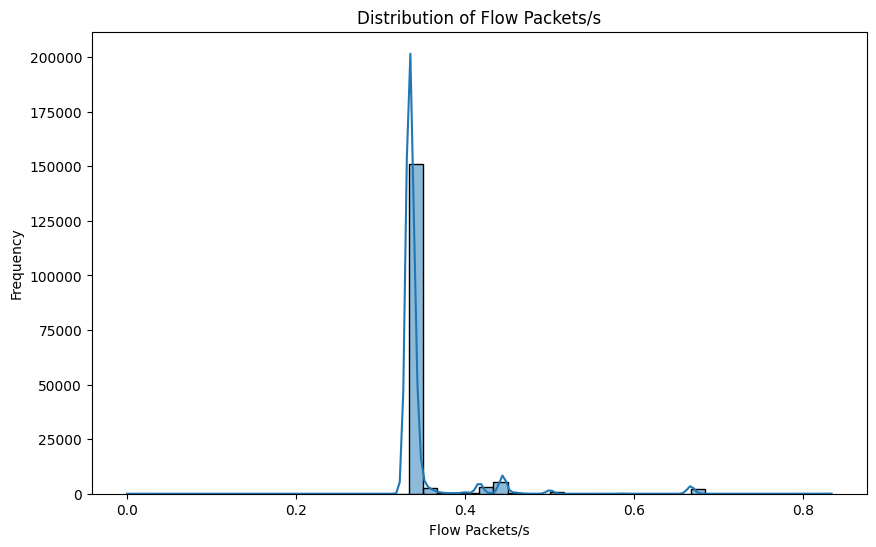



Column: Flow IAT Mean
Number of values close to 0: 59708
Percentage of values close to 0: 35.76%


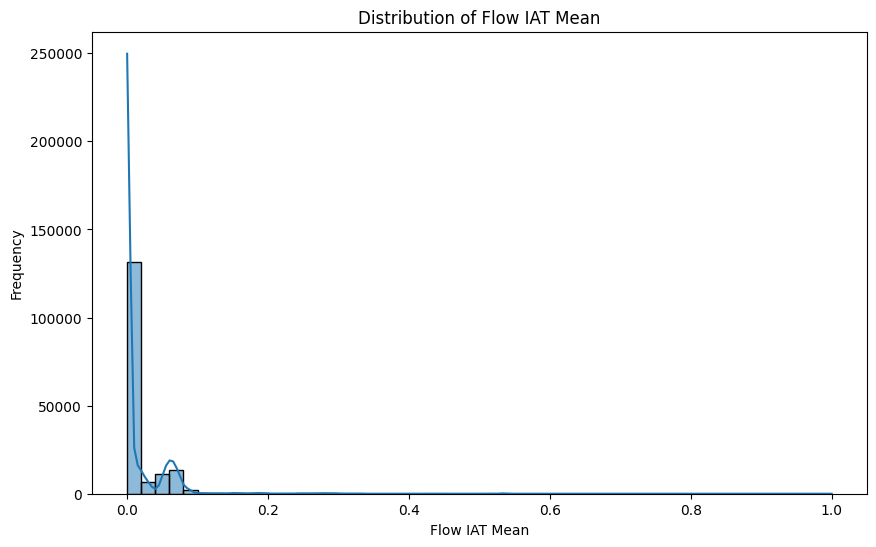



Column: Flow IAT Std
Number of values close to 0: 71385
Percentage of values close to 0: 42.75%


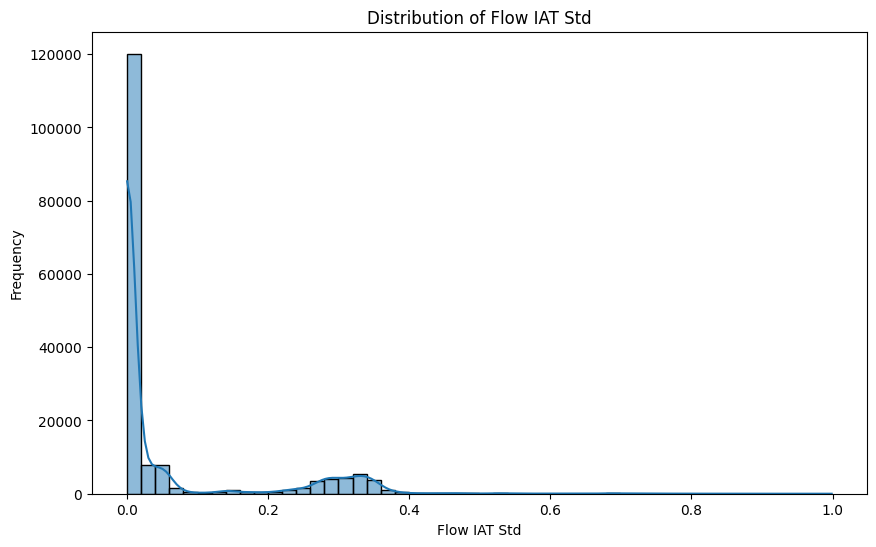



Column: Flow IAT Max
Number of values close to 0: 47916
Percentage of values close to 0: 28.70%


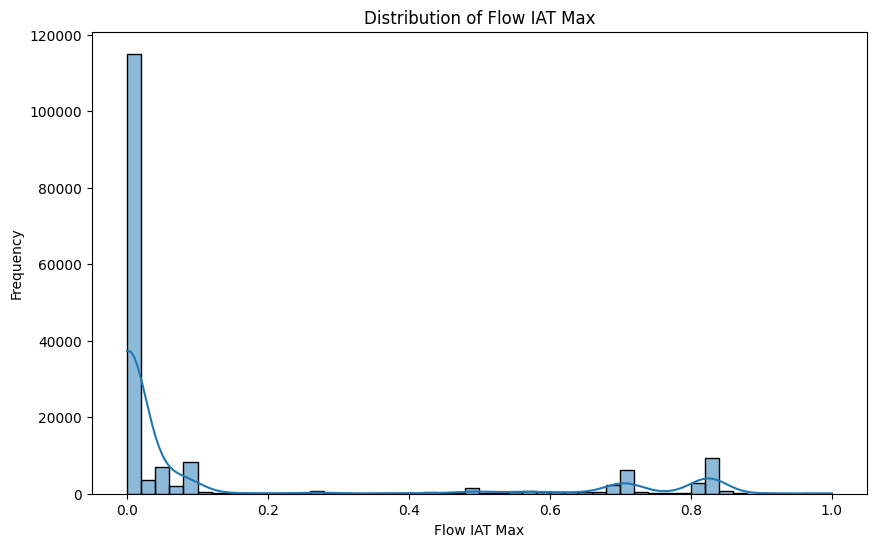



Column: Flow IAT Min
Number of values close to 0: 142128
Percentage of values close to 0: 85.12%


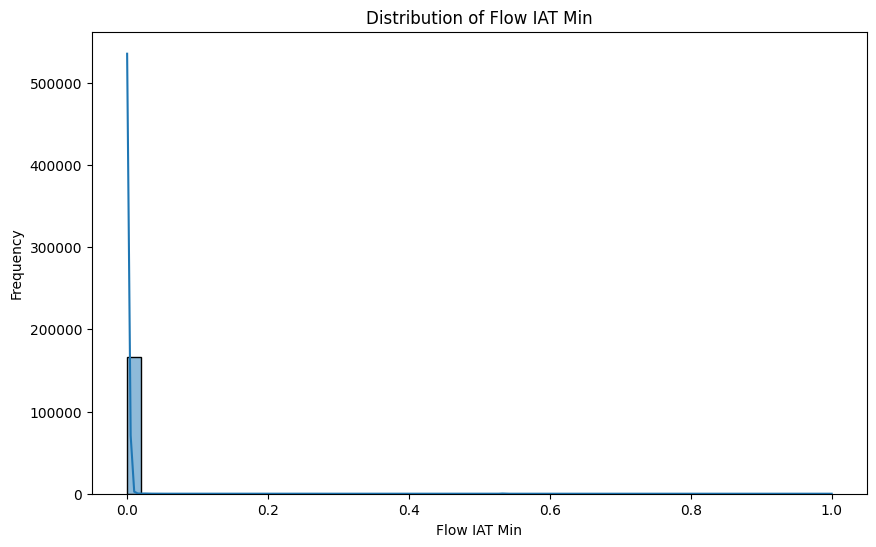



Column: Fwd IAT Total
Number of values close to 0: 82910
Percentage of values close to 0: 49.66%


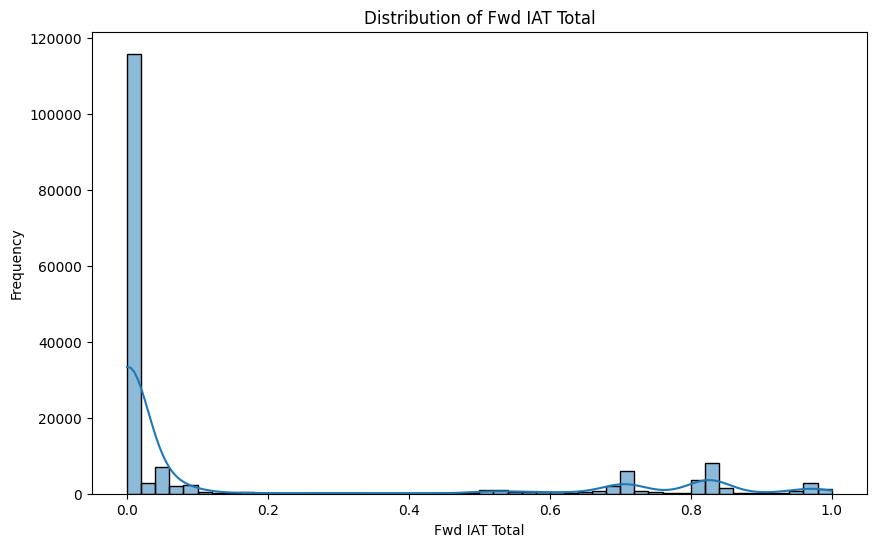



Column: Fwd IAT Mean
Number of values close to 0: 83302
Percentage of values close to 0: 49.89%


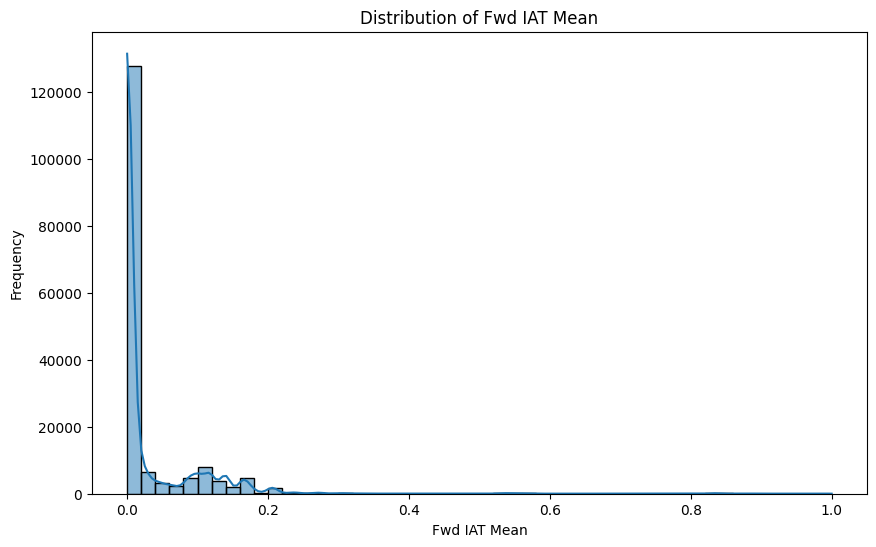



Column: Fwd IAT Std
Number of values close to 0: 93223
Percentage of values close to 0: 55.83%


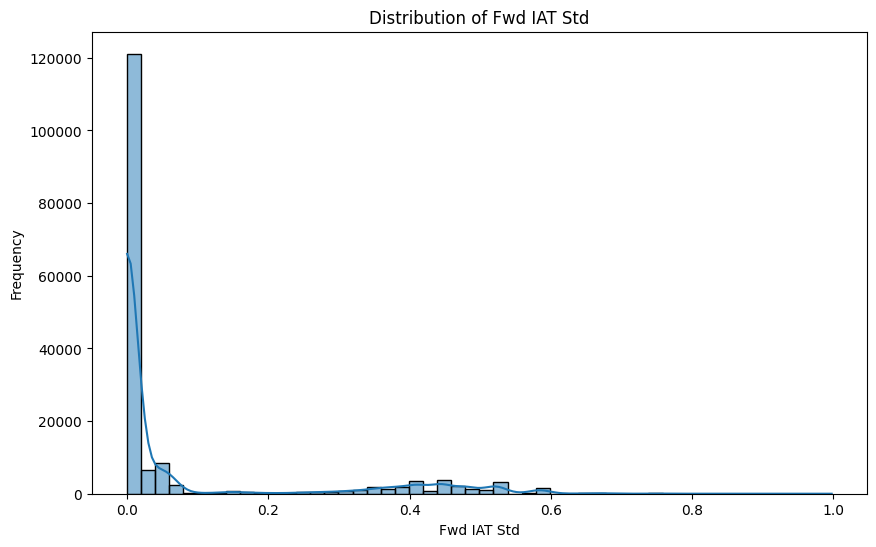



Column: Fwd IAT Max
Number of values close to 0: 82966
Percentage of values close to 0: 49.69%


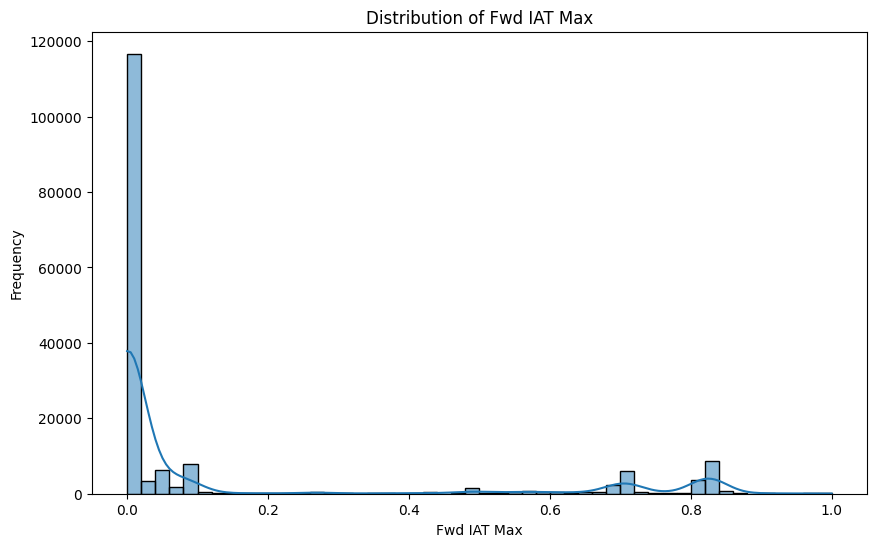



Column: Fwd IAT Min
Number of values close to 0: 134296
Percentage of values close to 0: 80.43%


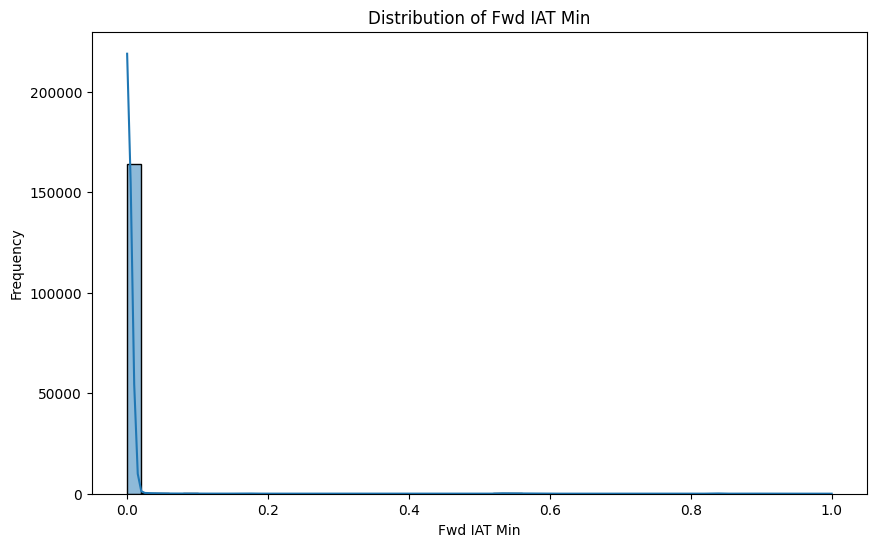



Column: Bwd IAT Total
Number of values close to 0: 104920
Percentage of values close to 0: 62.84%


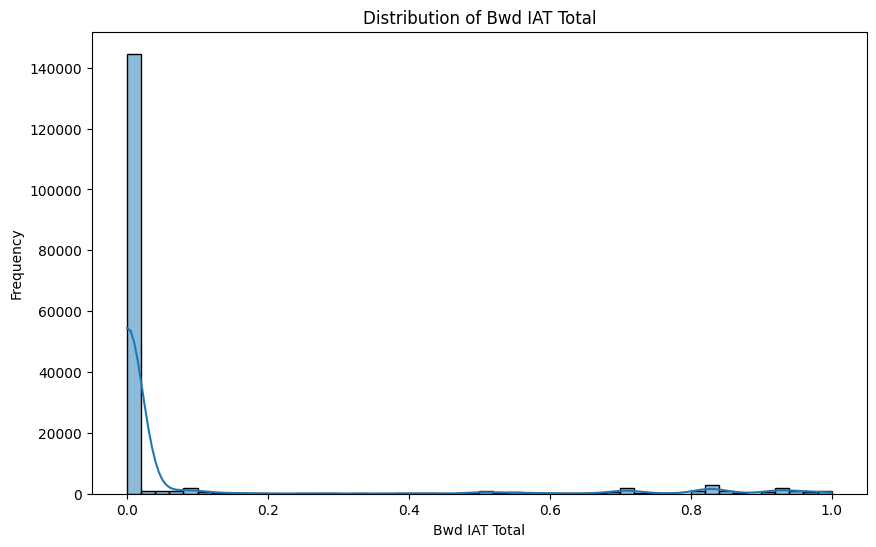



Column: Bwd IAT Mean
Number of values close to 0: 105058
Percentage of values close to 0: 62.92%


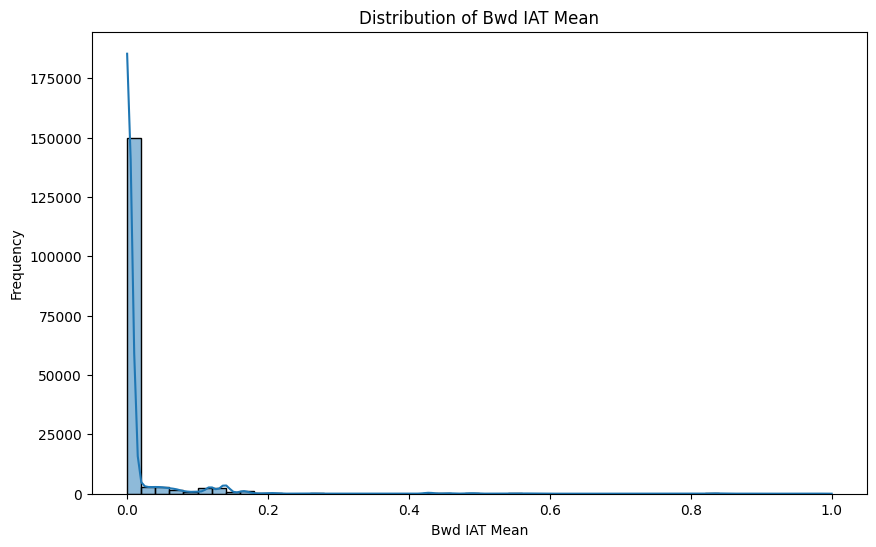



Column: Bwd IAT Std
Number of values close to 0: 108376
Percentage of values close to 0: 64.91%


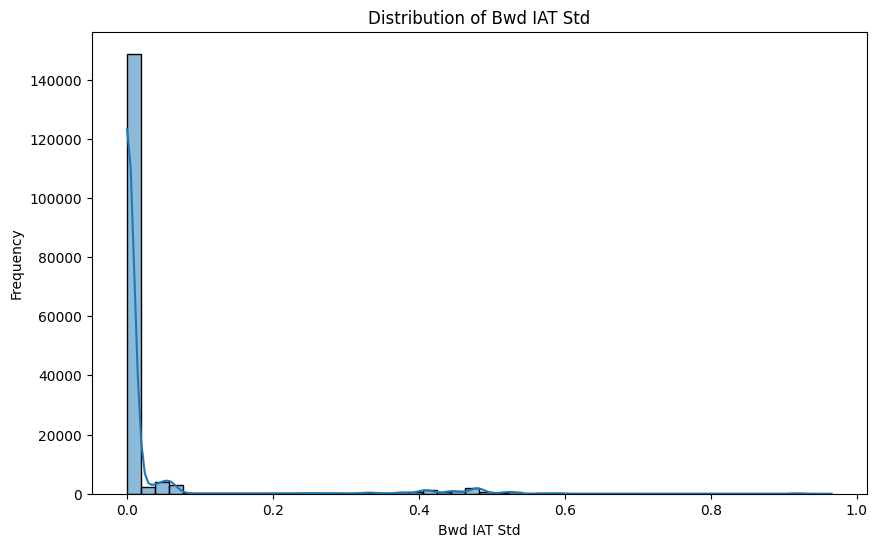



Column: Bwd IAT Max
Number of values close to 0: 104941
Percentage of values close to 0: 62.85%


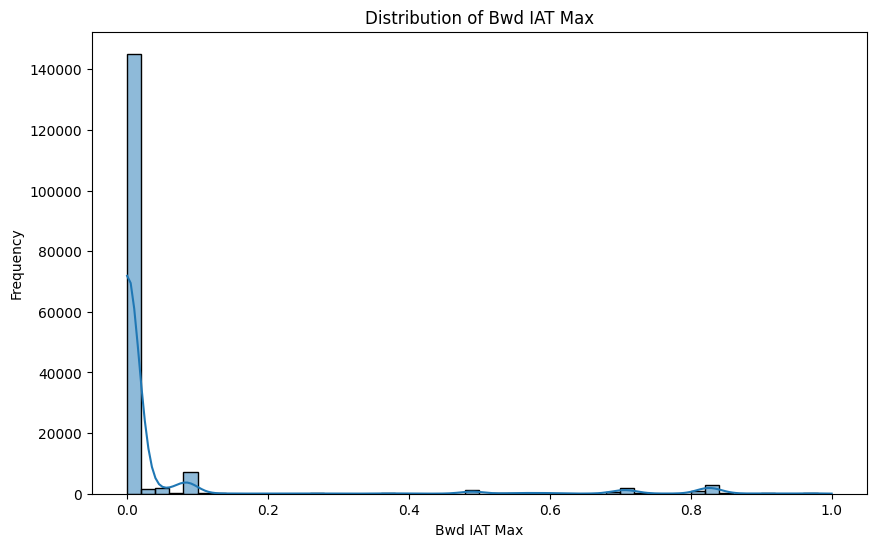



Column: Bwd IAT Min
Number of values close to 0: 150141
Percentage of values close to 0: 89.92%


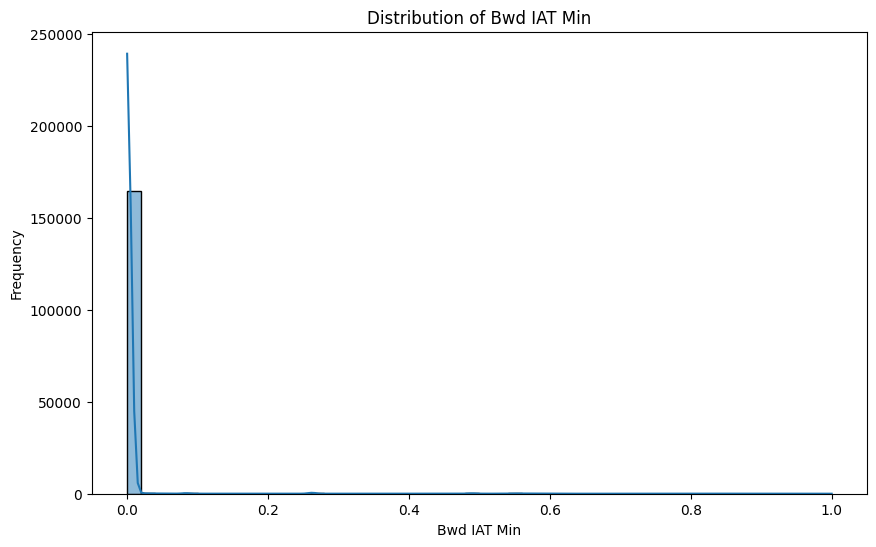



Column: Fwd PSH Flags
Number of values close to 0: 161501
Percentage of values close to 0: 96.73%


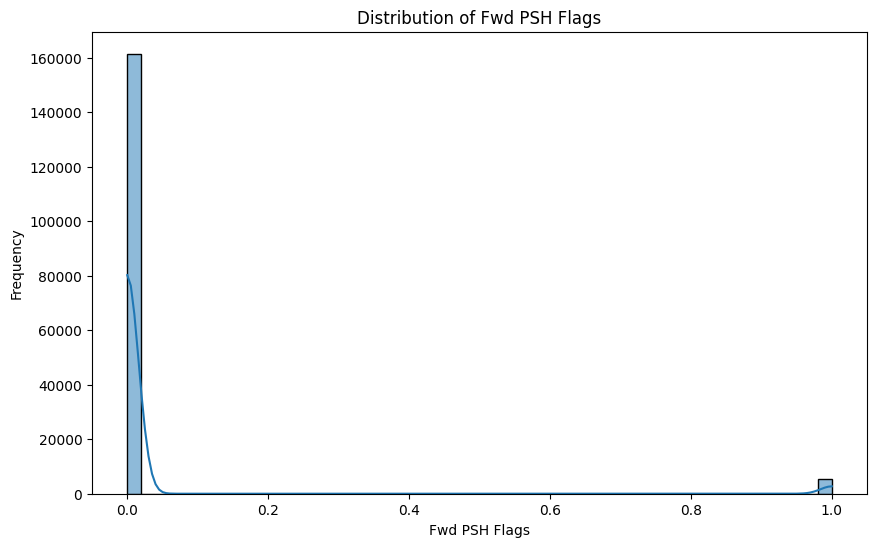



Column: Fwd URG Flags
Number of values close to 0: 166955
Percentage of values close to 0: 99.99%


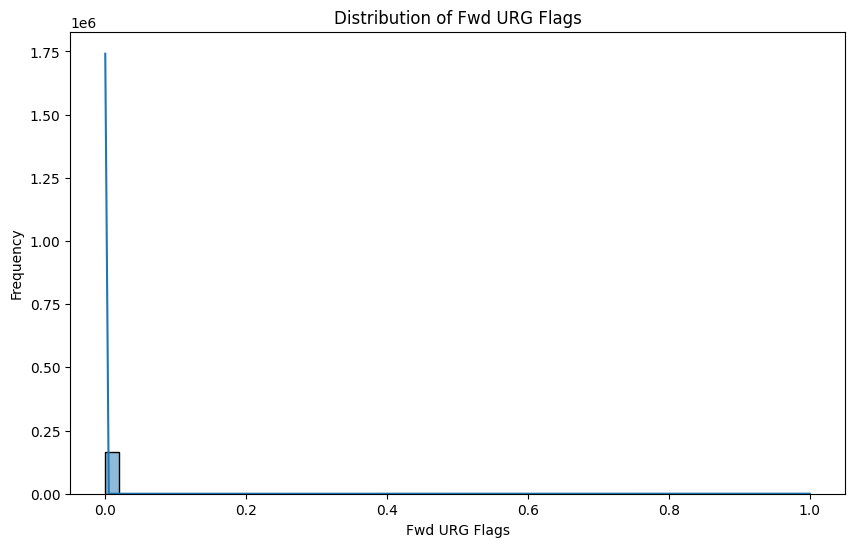



Column: Fwd Header Length
Number of values close to 0: 0
Percentage of values close to 0: 0.00%


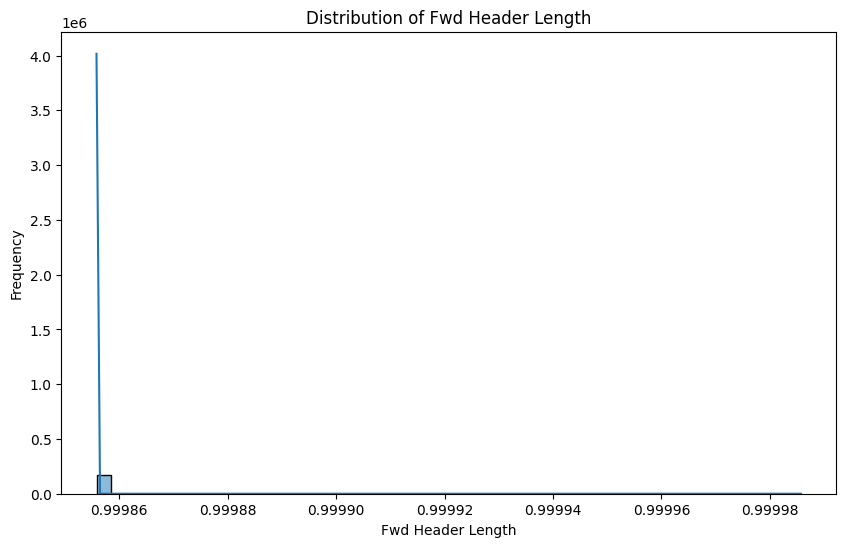



Column: Bwd Header Length
Number of values close to 0: 0
Percentage of values close to 0: 0.00%


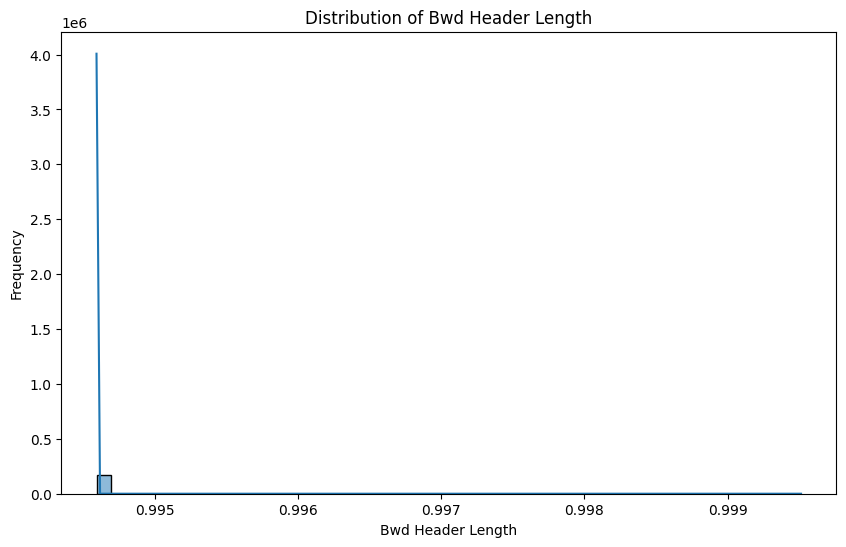



Column: Fwd Packets/s
Number of values close to 0: 56854
Percentage of values close to 0: 34.05%


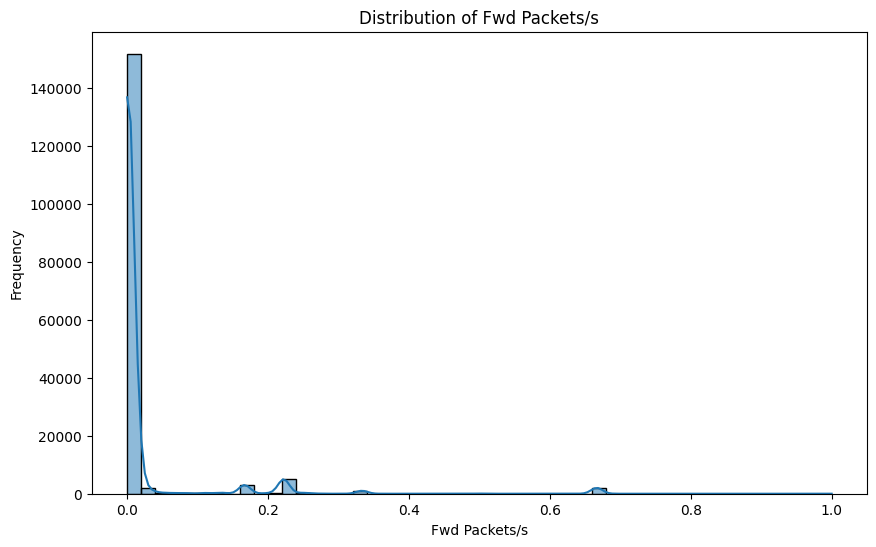



Column: Bwd Packets/s
Number of values close to 0: 75066
Percentage of values close to 0: 44.96%


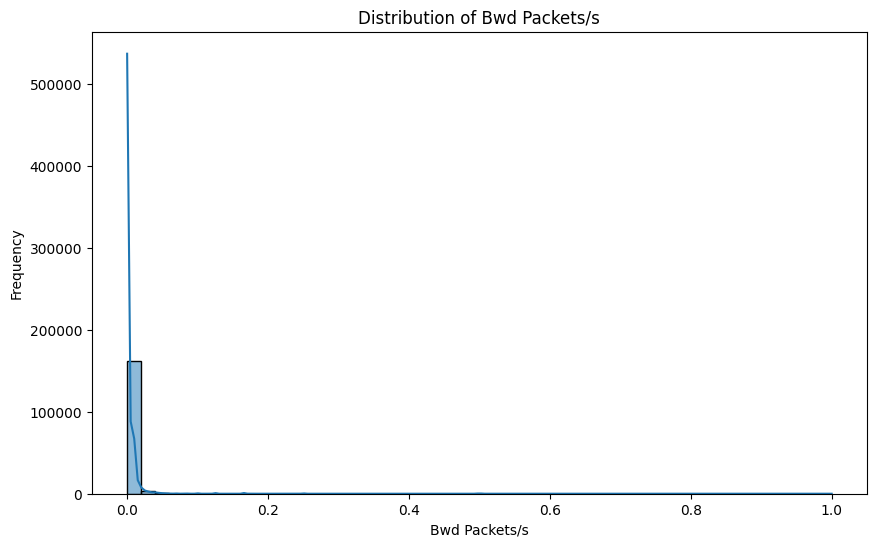



Column: Min Packet Length
Number of values close to 0: 97997
Percentage of values close to 0: 58.69%


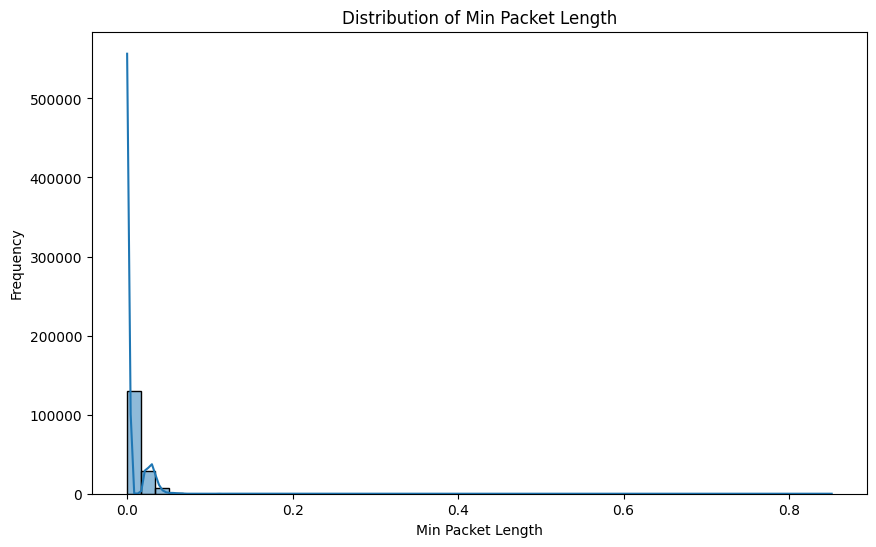



Column: Max Packet Length
Number of values close to 0: 21596
Percentage of values close to 0: 12.93%


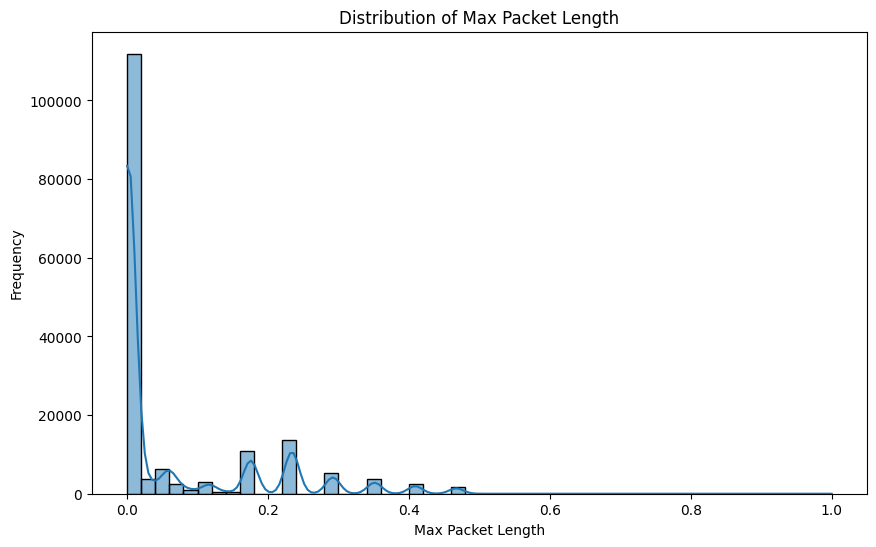



Column: Packet Length Mean
Number of values close to 0: 21596
Percentage of values close to 0: 12.93%


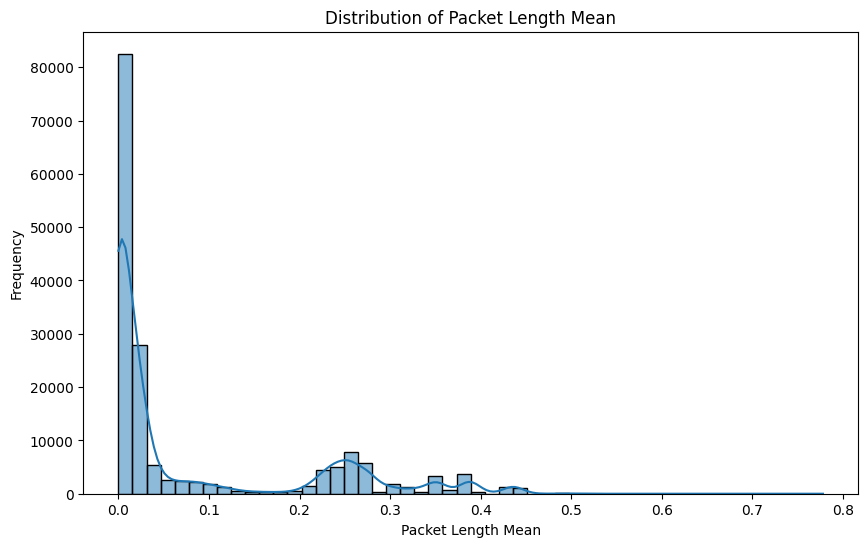



Column: Packet Length Std
Number of values close to 0: 40116
Percentage of values close to 0: 24.03%


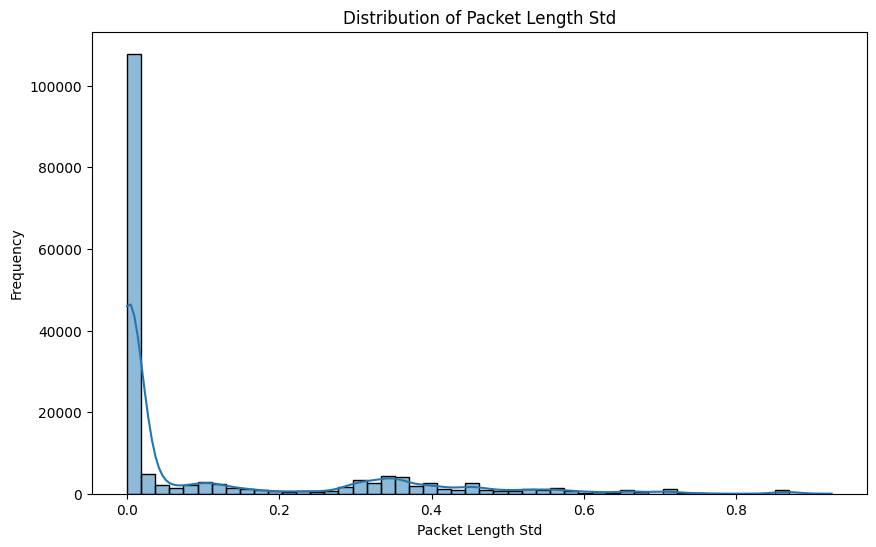



Column: Packet Length Variance
Number of values close to 0: 68613
Percentage of values close to 0: 41.09%


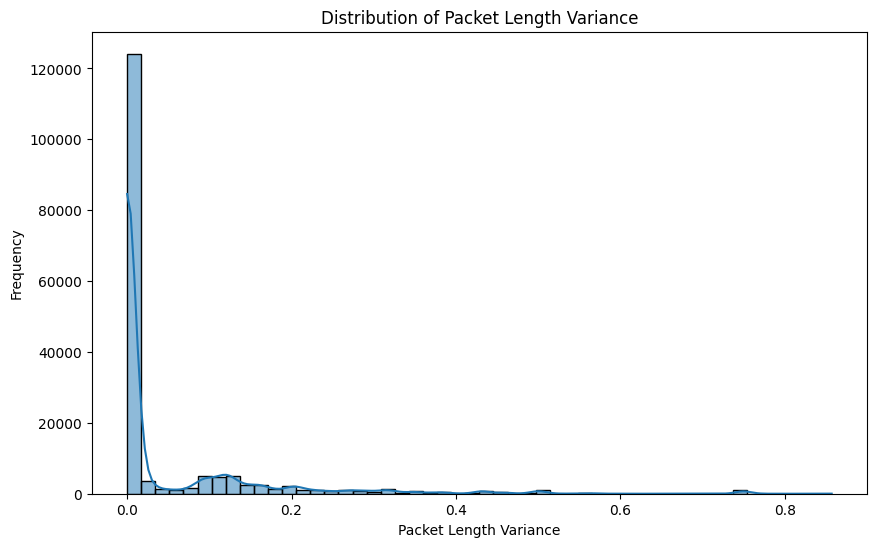



Column: FIN Flag Count
Number of values close to 0: 156535
Percentage of values close to 0: 93.75%


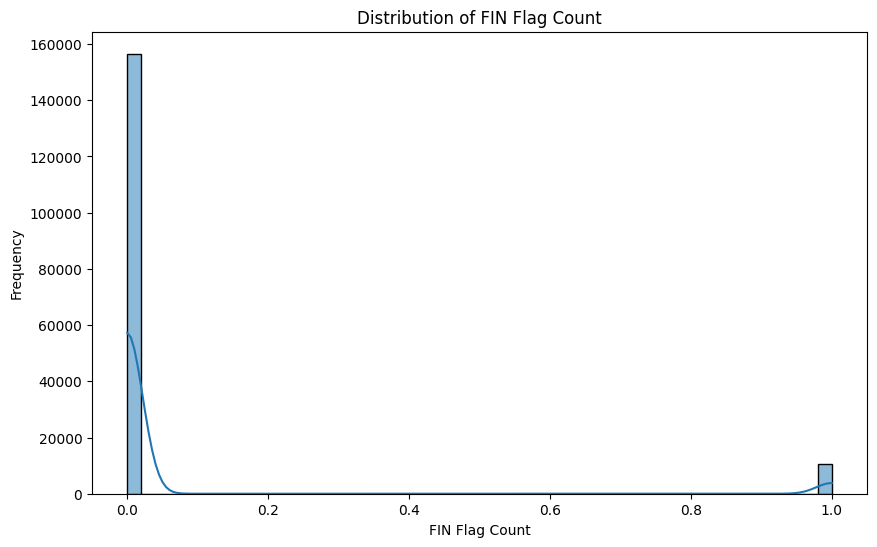



Column: PSH Flag Count
Number of values close to 0: 106784
Percentage of values close to 0: 63.96%


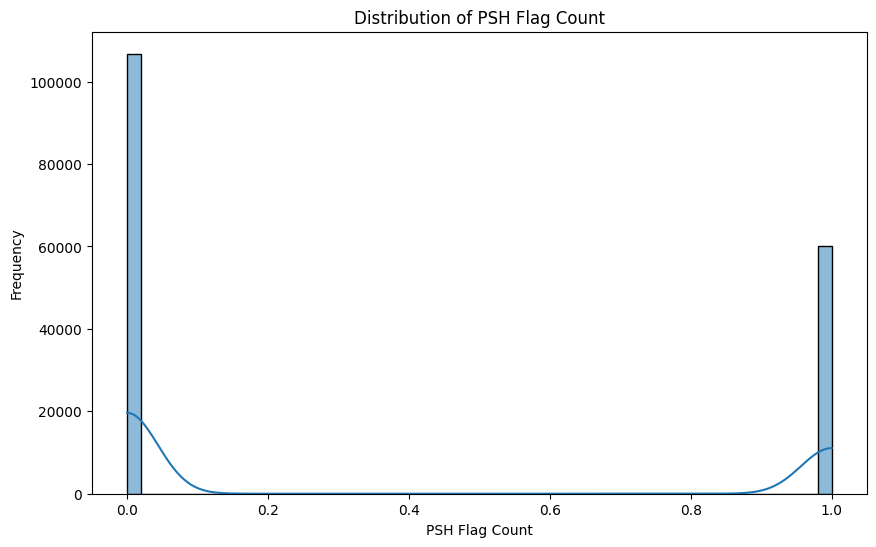



Column: ACK Flag Count
Number of values close to 0: 107160
Percentage of values close to 0: 64.18%


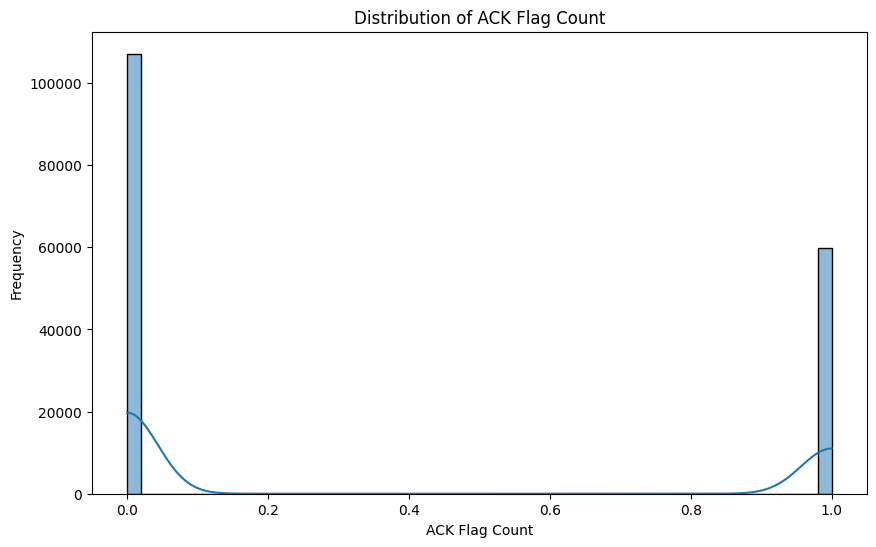



Column: URG Flag Count
Number of values close to 0: 156668
Percentage of values close to 0: 93.83%


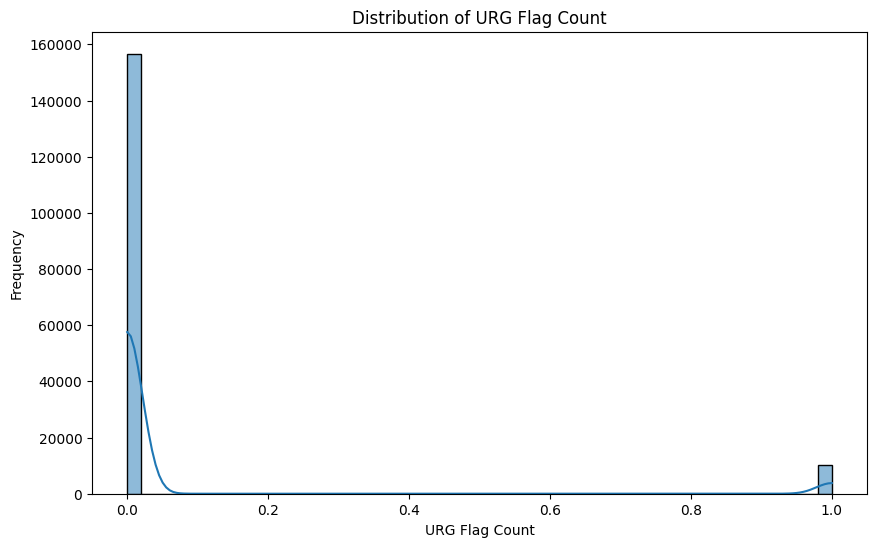



Column: Down/Up Ratio
Number of values close to 0: 66411
Percentage of values close to 0: 39.77%


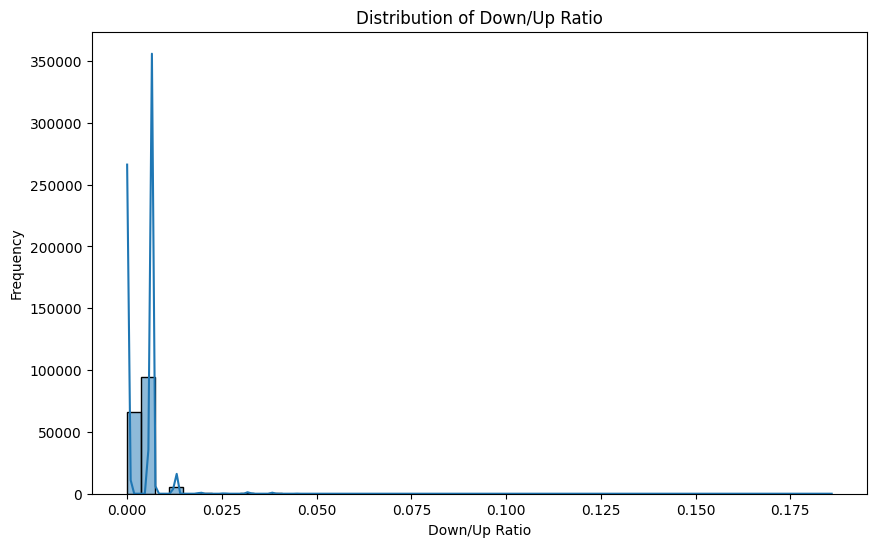



Column: Average Packet Size
Number of values close to 0: 21596
Percentage of values close to 0: 12.93%


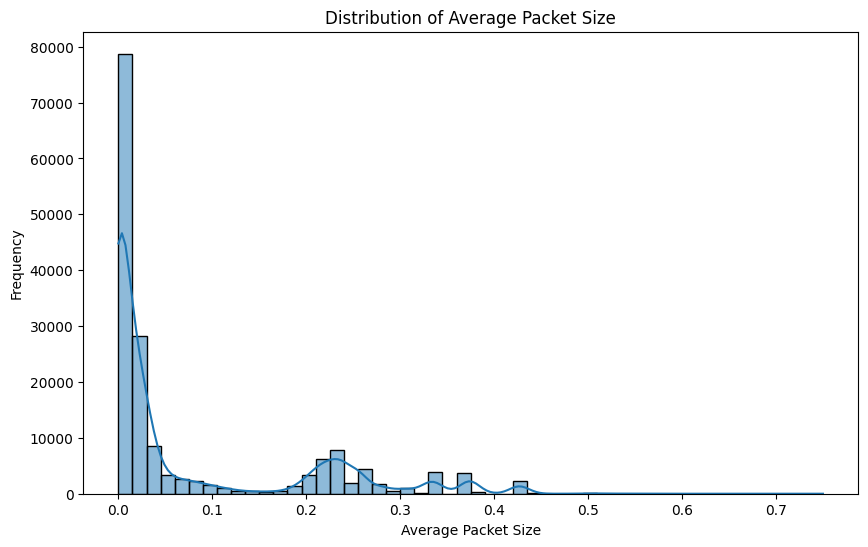



Column: Avg Bwd Segment Size
Number of values close to 0: 41740
Percentage of values close to 0: 25.00%


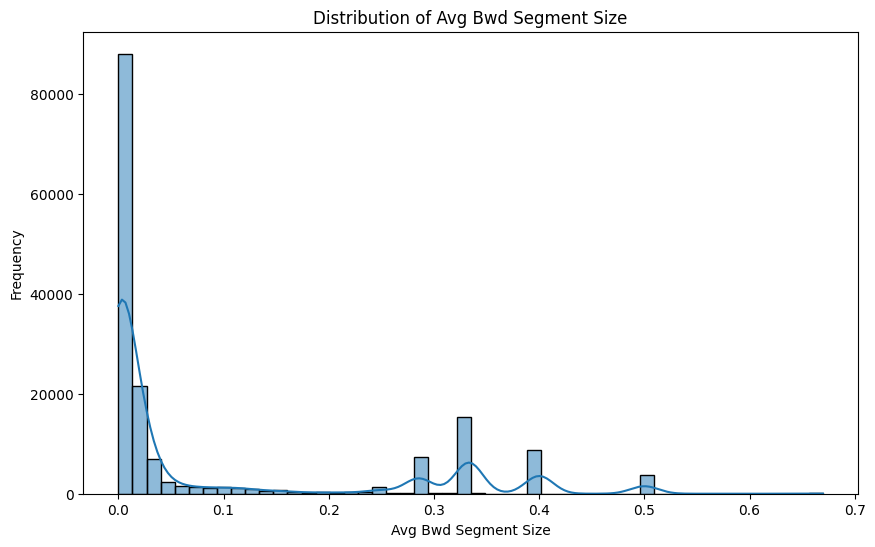



Column: Subflow Fwd Bytes
Number of values close to 0: 58778
Percentage of values close to 0: 35.20%


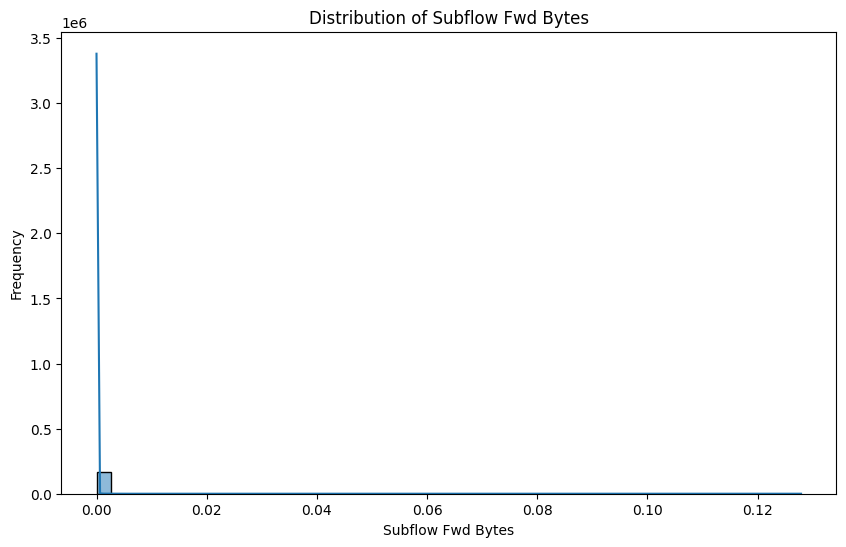



Column: Init_Win_bytes_forward
Number of values close to 0: 36937
Percentage of values close to 0: 22.12%


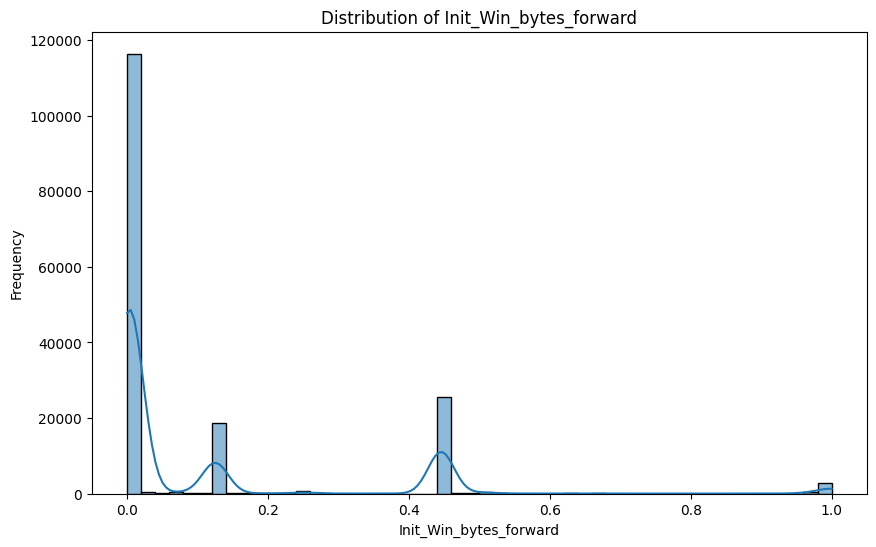



Column: Init_Win_bytes_backward
Number of values close to 0: 66767
Percentage of values close to 0: 39.99%


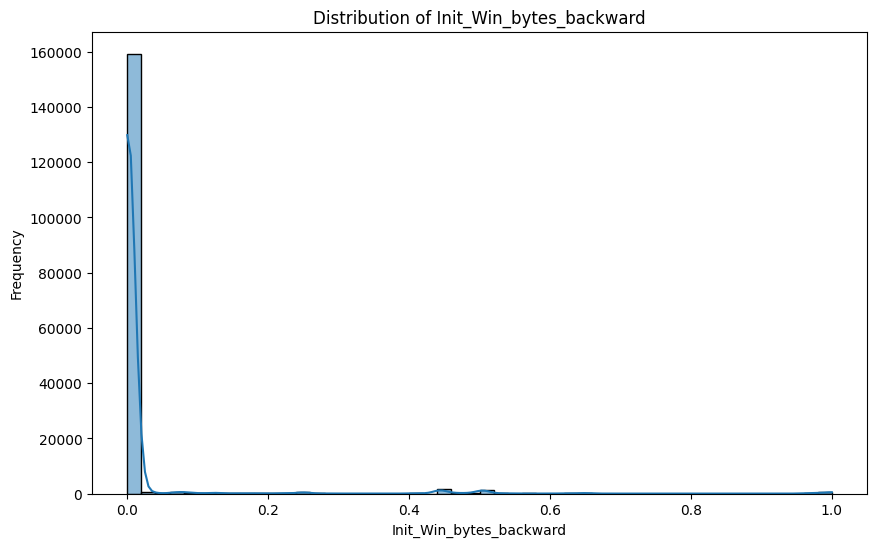



Column: act_data_pkt_fwd
Number of values close to 0: 62365
Percentage of values close to 0: 37.35%


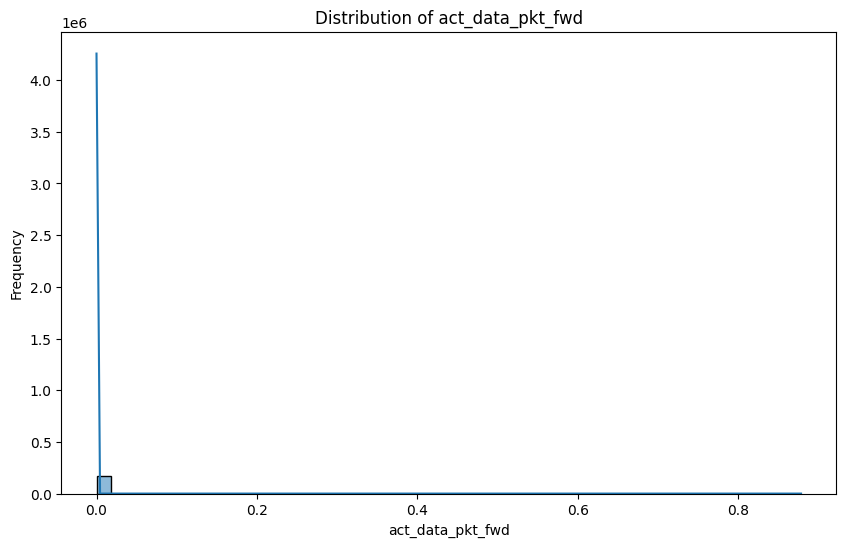



Column: min_seg_size_forward
Number of values close to 0: 0
Percentage of values close to 0: 0.00%


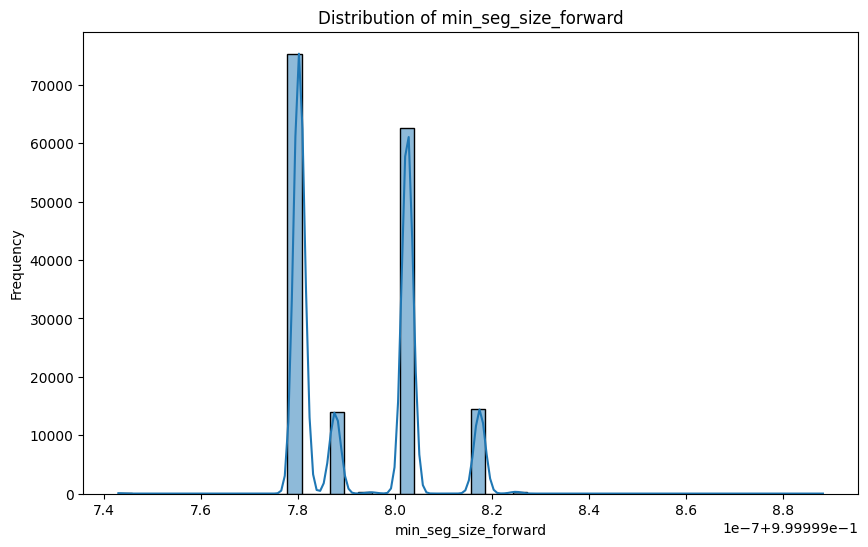



Column: Active Mean
Number of values close to 0: 127805
Percentage of values close to 0: 76.55%


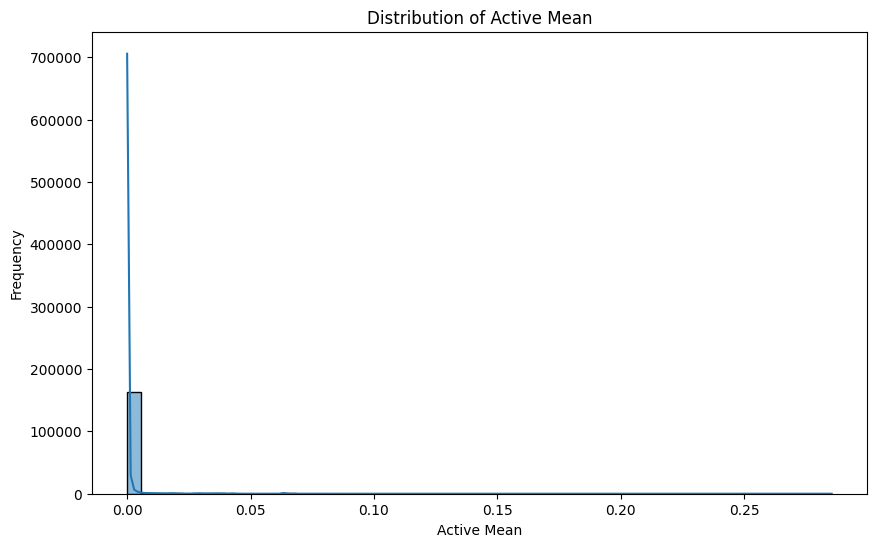



Column: Active Std
Number of values close to 0: 159249
Percentage of values close to 0: 95.38%


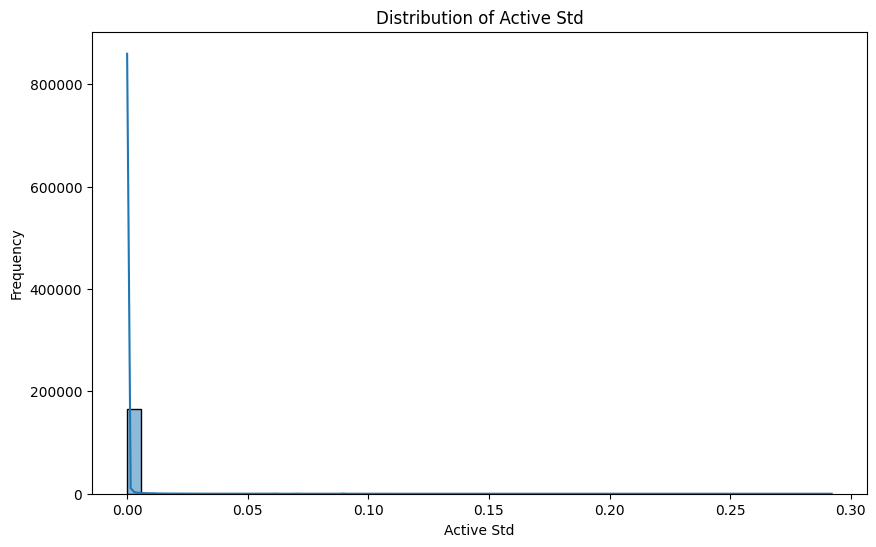



Column: Active Max
Number of values close to 0: 127805
Percentage of values close to 0: 76.55%


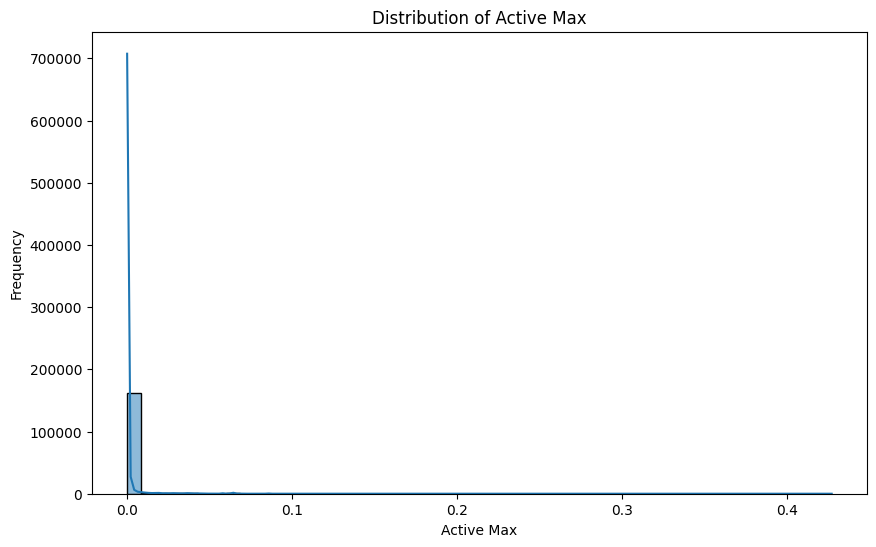



Column: Active Min
Number of values close to 0: 127893
Percentage of values close to 0: 76.60%


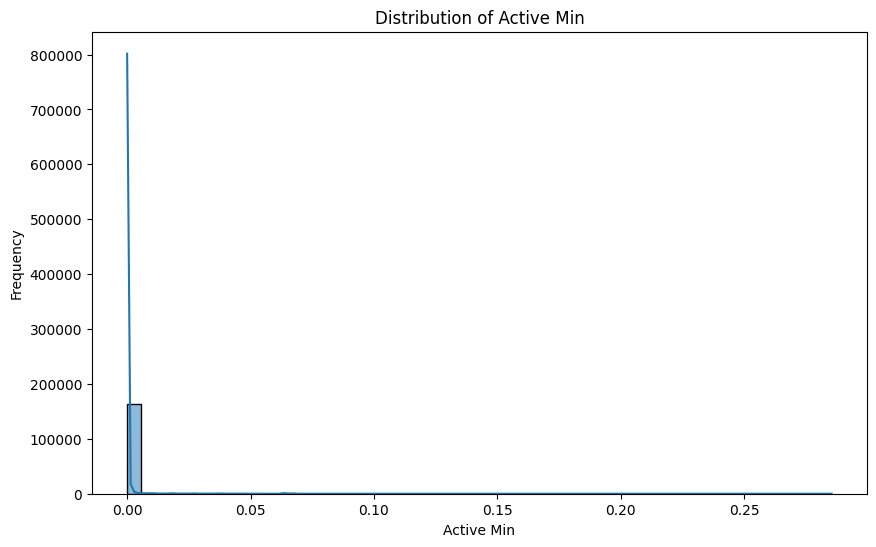



Column: Idle Mean
Number of values close to 0: 122339
Percentage of values close to 0: 73.27%


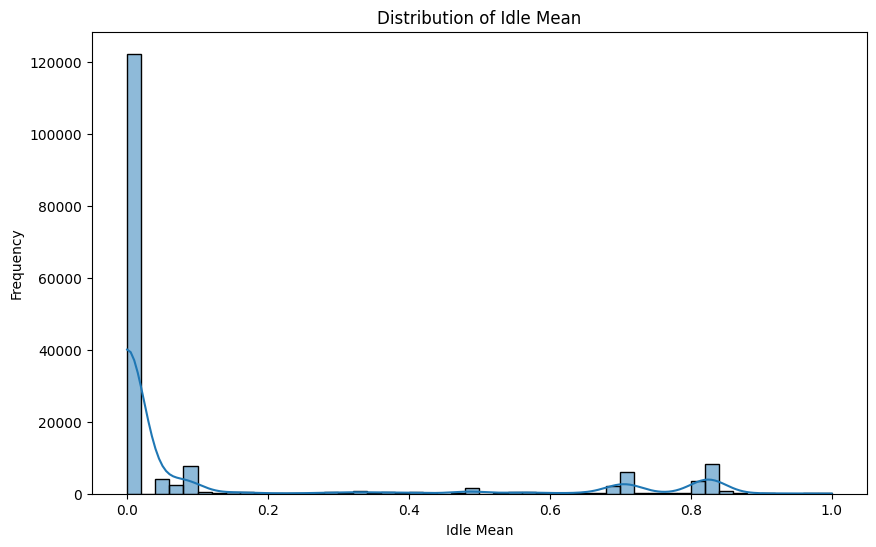



Column: Idle Std
Number of values close to 0: 156268
Percentage of values close to 0: 93.59%


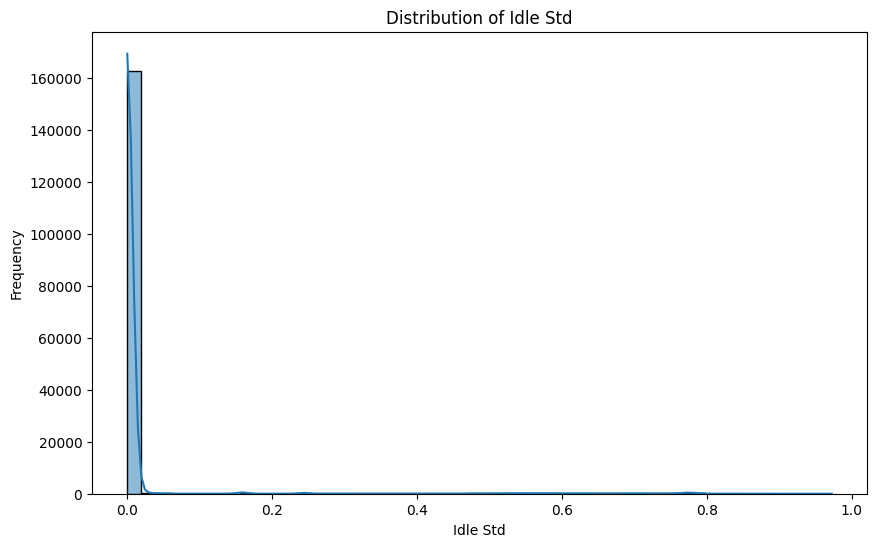



Column: Idle Max
Number of values close to 0: 122339
Percentage of values close to 0: 73.27%


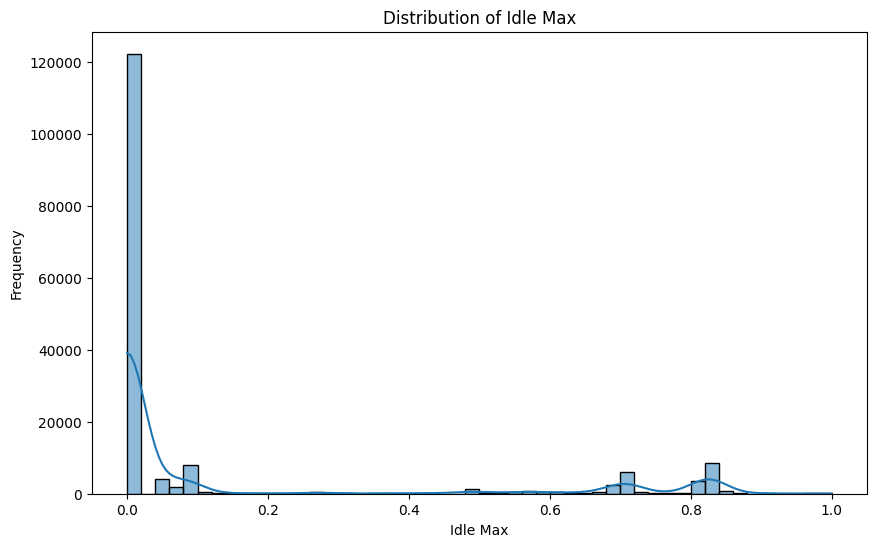



Column: Idle Min
Number of values close to 0: 122339
Percentage of values close to 0: 73.27%


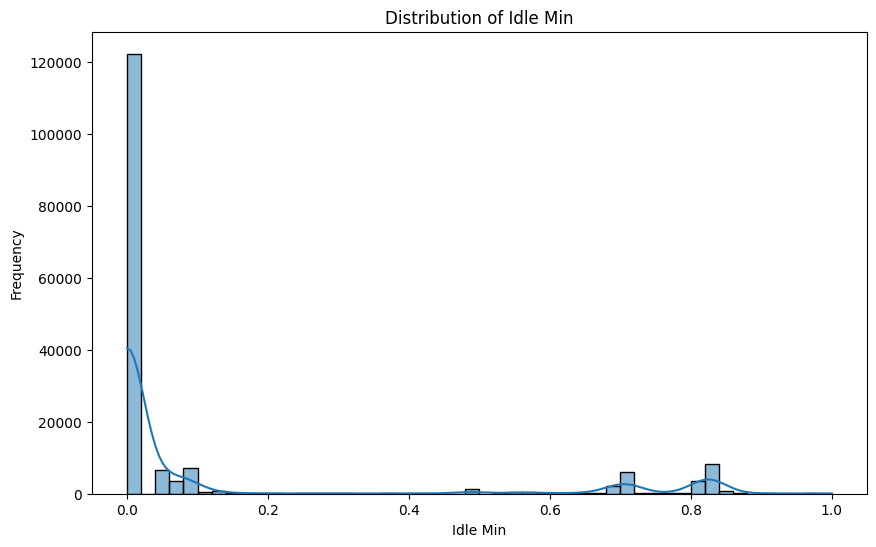



Column: Label
Number of values close to 0: 83484
Percentage of values close to 0: 50.00%


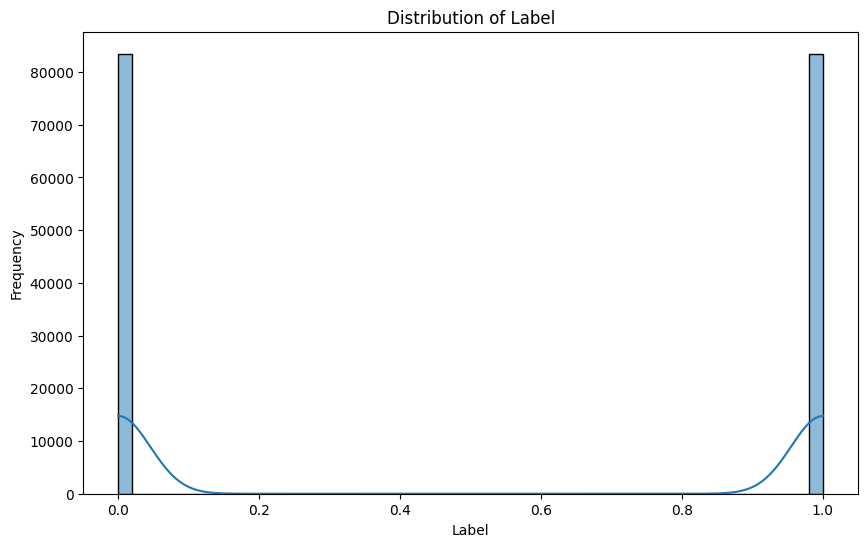

In [4]:
# Function to count values close to 0
def count_values_close_to_zero(series, threshold=1e-6):
    return (np.abs(series) < threshold).sum()

# Analyze each column
zero_counts = {}
for column in data.columns:
    zero_count = count_values_close_to_zero(data[column])
    zero_percentage = zero_count / len(data) * 100
    zero_counts[column] = zero_percentage
    print(f"Column: {column}")
    print(f"Number of values close to 0: {zero_count}")
    print(f"Percentage of values close to 0: {zero_percentage:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=50, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("\n")

## Bar Plot of Percentage of Data Close to 0
Show a bar plot of the percentage of values close to 0 for each feature.

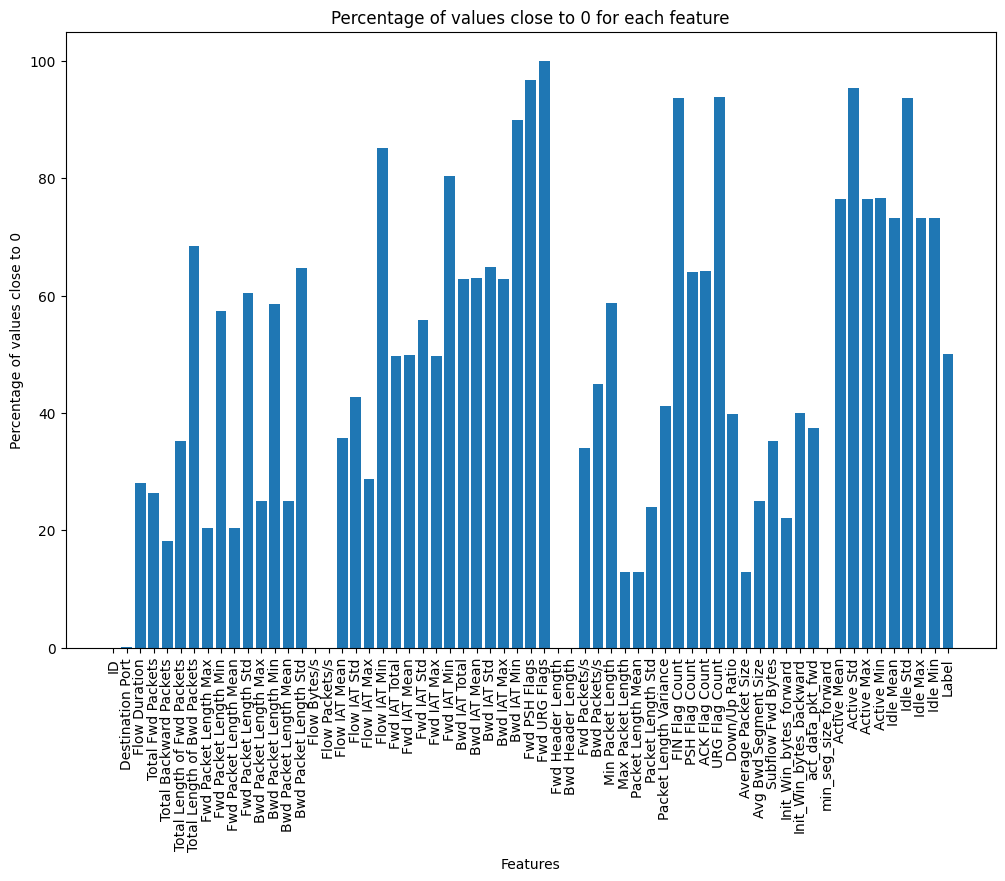

In [5]:
# Bar plot of percentage of values close to 0
plt.figure(figsize=(12, 8))
plt.bar(zero_counts.keys(), zero_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of values close to 0')
plt.title('Percentage of values close to 0 for each feature')
plt.show()

## Correlation Matrix
Show the correlation matrix to understand the relationships between different features.

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplots for Outlier Detection
Boxplots can help in detecting outliers in each column.

In [ ]:
# Boxplots for each column
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()
    print("\n")

## Pairplot for Feature Relationships
Visualize relationships between features using pairplots.

In [ ]:
# Pairplot
sns.pairplot(data)
plt.show()